In [45]:
import sklearn
from sklearn.manifold import TSNE
RS = 20150101

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
gene_df = pd.read_csv("GSM2629342_AB1443.txt", comment="#", sep="\t") 
gene_df = gene_df.T
gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]


X = np.vstack([gene_df.iloc[i] for i in range(gene_count)])
Y = np.hstack([gene_df[i] for i in gene_df.iloc[0].keys()])


In [87]:
#часть про покраску, генерирую столбец с числами
sp = []
for x in range(gene_count):
    if x % 2 == 0:
        sp.append("aaa")
    else:
        sp.append("bbb")
gene_df["cluster"] = sp


<IPython.core.display.Javascript object>


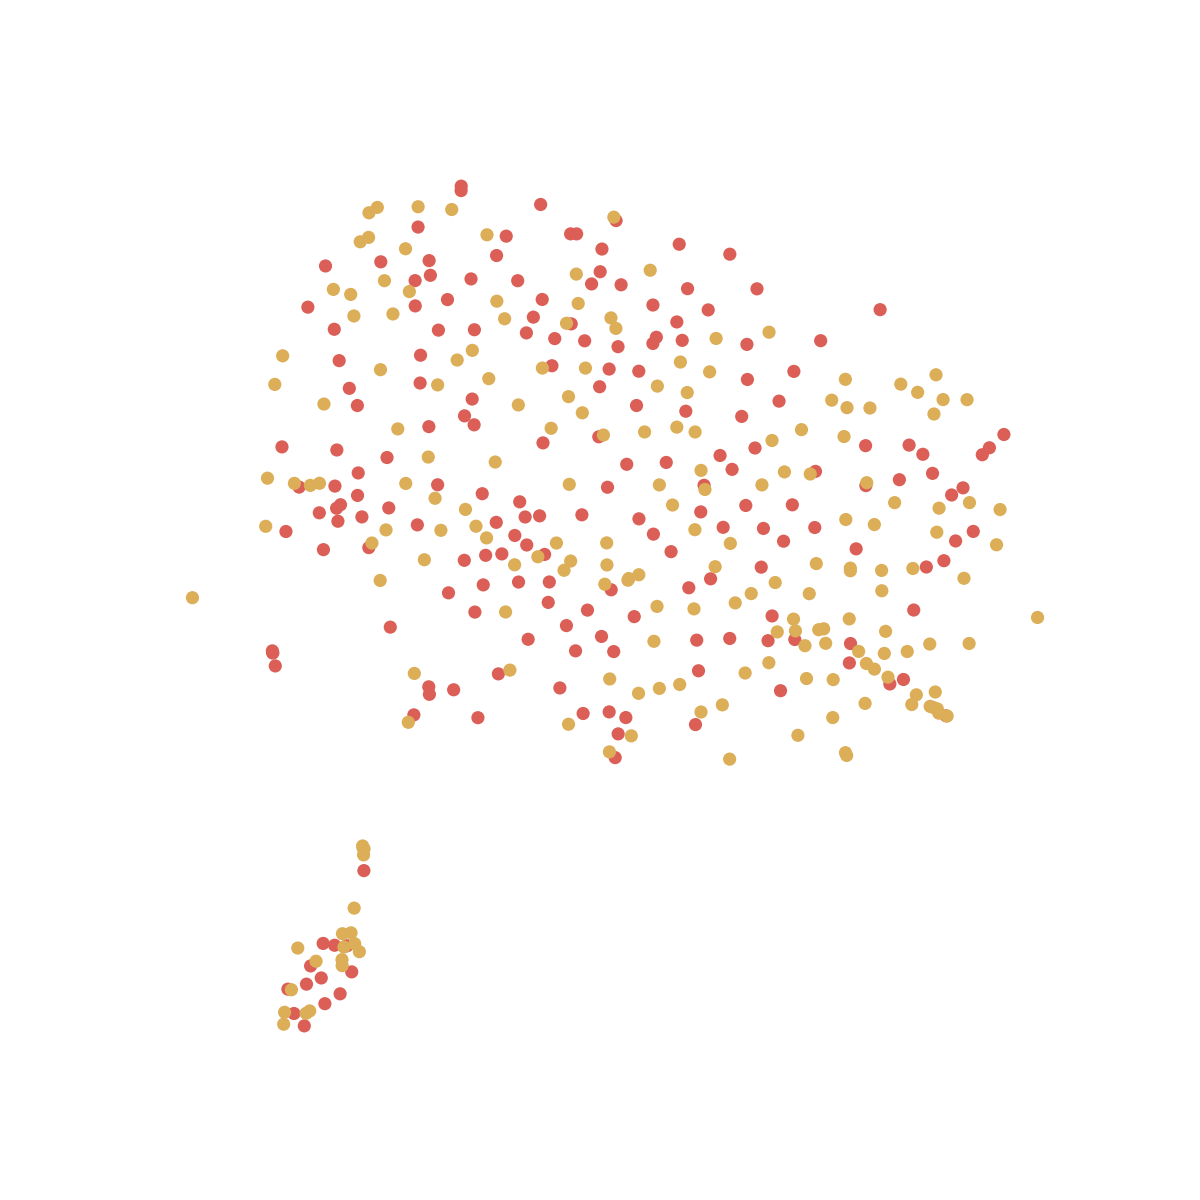

(<matplotlib.figure.Figure at 0x2078bff1710>,
 <matplotlib.collections.PathCollection at 0x2078a92d898>)

In [74]:
#непосредственно сама функция для покраски
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

%matplotlib notebook
y = np.hstack([gene_df["cluster"][gene_df["cluster"] == i] for i in [0, 1]]) #здесь в списке должны быть встречающиеся значения
scatter(digits, y)


<IPython.core.display.Javascript object>


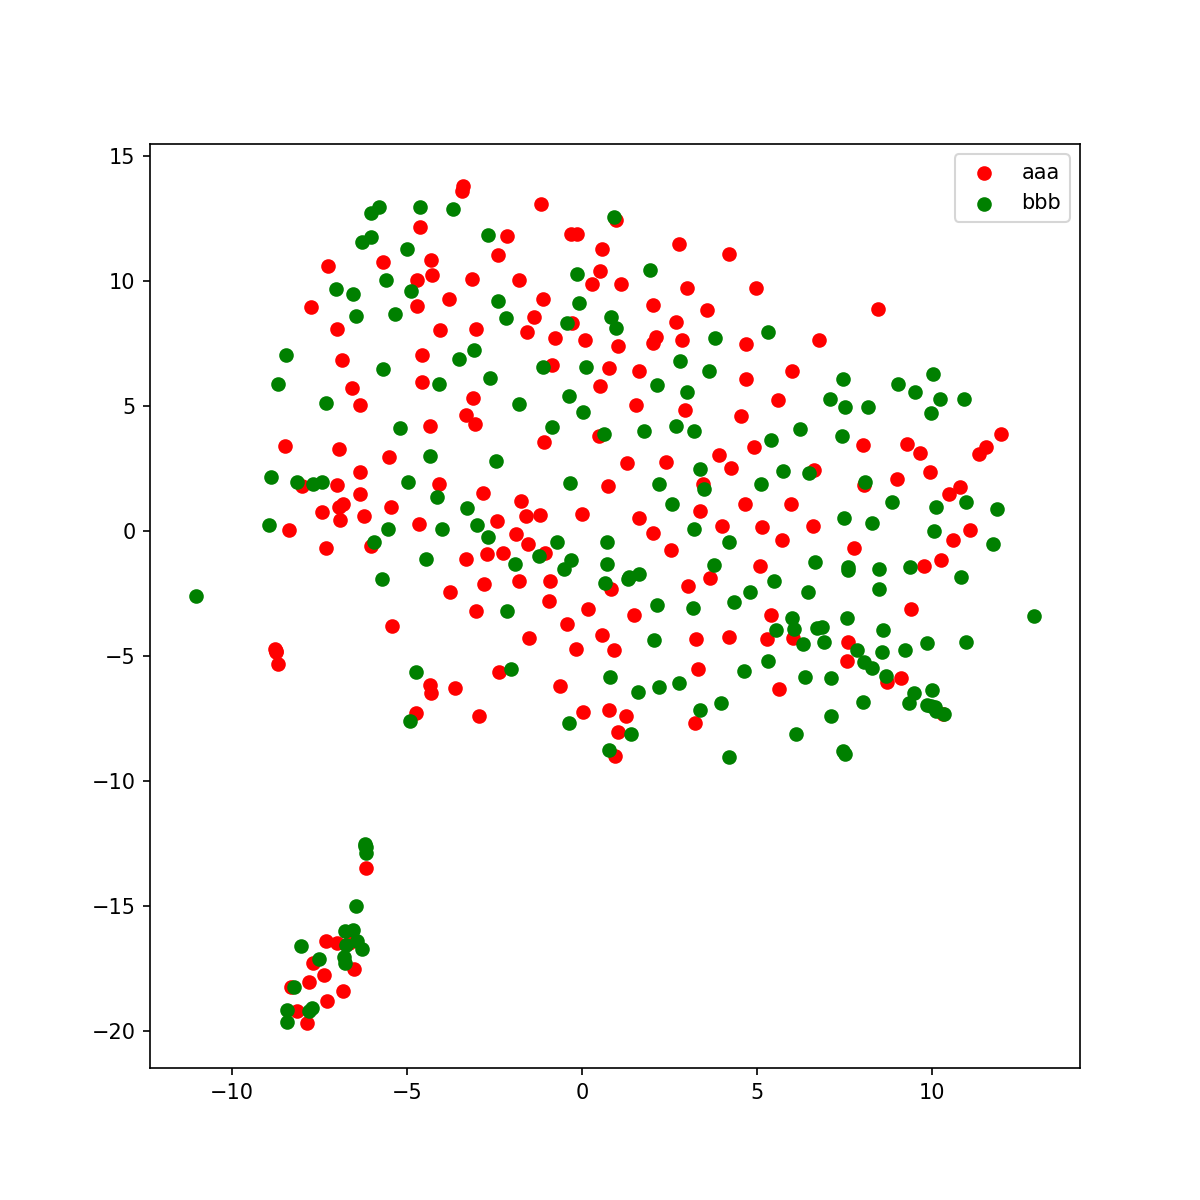

In [88]:
target_ids = range(len(gene_df["cluster"]))


from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
colors = 'r', 'g' #в зависимости от количества типов нужно задать количество цветов

for i, c, label in zip(target_ids, colors, gene_df["cluster"]):
    plt.scatter(digits[y == i, 0], digits[y == i, 1], c=c, label=label) 
    #в качестве у должен подаваться вектор из чисел, вектор из строк он не признает
plt.legend()
plt.show()

In [46]:
digits = TSNE(random_state=0, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


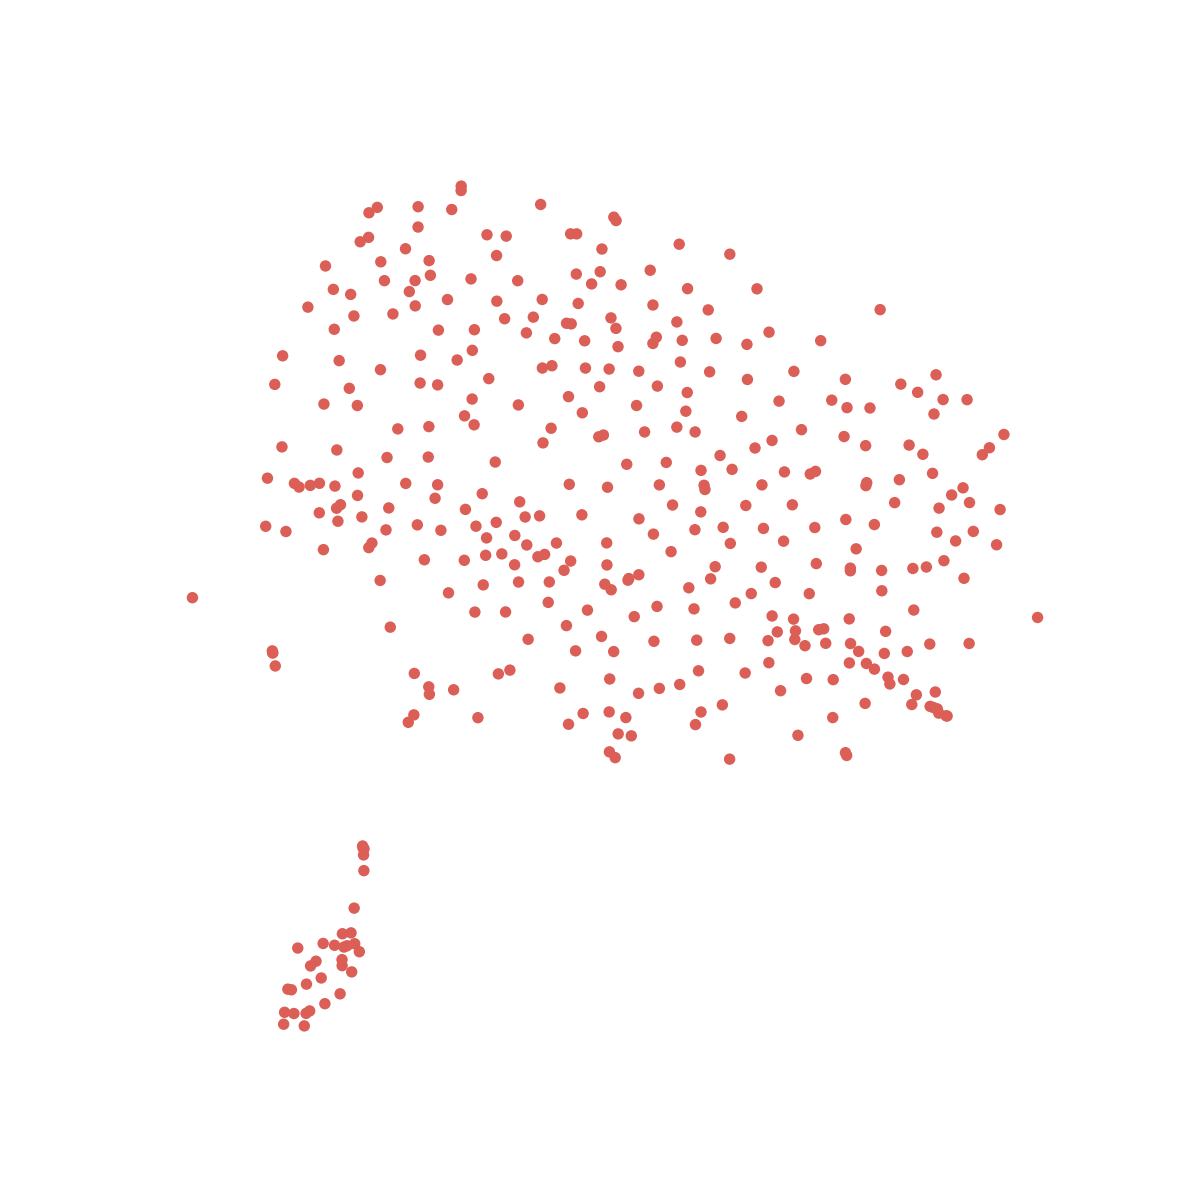

In [14]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 1000))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=30, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

scatter(digits, Y)
plt.legend()
plt.show()

In [5]:
plt.savefig('digits_tsne-generated.png', dpi=500)